In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from dbscan_cluster import run_dbscan
from cluster_utils import cluster_plot, cluster_plot_galactic
import json

from astropy.coordinates import SkyCoord, ICRS
import astropy.units as u
from simbad_download import resolve_name
from uncertainties import unumpy, ufloat
from sklearn.preprocessing import StandardScaler

In [28]:
CLUSTER_NAME: str = 'Berkeley 36'

In [29]:
gaiadr3 = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}.csv')
normalized = np.loadtxt(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_normalized.dat')
uncert = np.loadtxt(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_normalized_uncert.dat')
normalized_cp = np.loadtxt(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_normalized_cp.dat')
uncert_cp = np.loadtxt(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_normalized_cp_uncert.dat')
lit = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_literature.csv')

In [30]:
lit_dr3 = pd.merge(left=lit[['EDR3 id', 'reported', 'TIC']], right=gaiadr3, left_on='EDR3 id', right_on='source_id', how='inner')

In [31]:
cp_ra, cp_dec, cp_par, cp_pmra, cp_pmdec, cp_radvel = resolve_name(CLUSTER_NAME)

In [32]:
galactic_coords = SkyCoord(ra=cp_ra*u.deg, dec=cp_dec*u.deg,
                           pm_ra_cosdec=cp_pmra*u.mas/u.year, frame=ICRS,
                           pm_dec=cp_pmdec*u.mas/u.year).galactic

In [33]:
galactic_coords

<SkyCoord (Galactic): (l, b) in deg
    (227.49688289, -0.56315822)
 (pm_l_cosb, pm_b) in mas / yr
    (-1.56485212, -1.12537232)>

# Plain DBSCAN

In [44]:
clustered, noise, found, not_found = run_dbscan(normalized, gaiadr3, lit_dr3, 0.35, 40, False)

Classified into 2 labels.
Clustered: 24/46
24/46 sources from literature clustered
194 clustered sources.


In [68]:
clustered_sets = []
noise_sets = []
found_sets = []
not_found_sets = []

for _ in range(100):
    normalized_u = normalized + np.random.normal(scale=np.abs(uncert), size=normalized.shape)
    clustered, noise, found, not_found = run_dbscan(normalized_u, gaiadr3, lit_dr3, 0.4, 10, False)
    clustered_sets.append(clustered)
    noise_sets.append(noise)
    found_sets.append(found)
    not_found_sets.append(not_found)

Classified into 5 labels.
Clustered: 35/46
35/46 sources from literature clustered
146 clustered sources.
Classified into 5 labels.
Clustered: 42/46
42/46 sources from literature clustered
180 clustered sources.
Classified into 6 labels.
Clustered: 37/46
37/46 sources from literature clustered
152 clustered sources.
Classified into 6 labels.
Clustered: 34/46
34/46 sources from literature clustered
133 clustered sources.
Classified into 4 labels.
Clustered: 33/46
33/46 sources from literature clustered
141 clustered sources.
Classified into 7 labels.
Clustered: 29/46
29/46 sources from literature clustered
145 clustered sources.
Classified into 3 labels.
Clustered: 41/46
41/46 sources from literature clustered
159 clustered sources.
Classified into 3 labels.
Clustered: 34/46
34/46 sources from literature clustered
136 clustered sources.
Classified into 4 labels.
Clustered: 34/46
34/46 sources from literature clustered
140 clustered sources.
Classified into 2 labels.
Clustered: 34/46
34/

Classified into 3 labels.
Clustered: 31/46
31/46 sources from literature clustered
115 clustered sources.
Classified into 7 labels.
Clustered: 31/46
31/46 sources from literature clustered
113 clustered sources.
Classified into 3 labels.
Clustered: 37/46
37/46 sources from literature clustered
154 clustered sources.
Classified into 5 labels.
Clustered: 32/46
32/46 sources from literature clustered
143 clustered sources.
Classified into 3 labels.
Clustered: 38/46
38/46 sources from literature clustered
146 clustered sources.
Classified into 5 labels.
Clustered: 39/46
39/46 sources from literature clustered
131 clustered sources.
Classified into 4 labels.
Clustered: 32/46
32/46 sources from literature clustered
140 clustered sources.
Classified into 6 labels.
Clustered: 32/46
32/46 sources from literature clustered
149 clustered sources.
Classified into 3 labels.
Clustered: 38/46
38/46 sources from literature clustered
166 clustered sources.
Classified into 5 labels.
Clustered: 23/46
23/

In [69]:
clustered = pd.concat(clustered_sets).drop_duplicates(subset=['source_id'])
len(clustered)

939

In [70]:
found = pd.concat(found_sets).drop_duplicates(subset=['source_id'])
len(found)

46

In [71]:
not_found = pd.concat(not_found_sets).drop_duplicates(subset=['source_id'])
len(not_found)

43

In [72]:
clustered.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,A_y,A_J,A_H,A_K,BP-RP,BP-RP_error,G_abs,G_abs_error,excess,label
1161,1636148068921376768,Gaia DR3 3032907098990009088,3032907098990009088,889834924,2016.0,109.097291,0.126001,-13.535945,0.134587,0.190433,...,2.388333,1.498996,0.886879,0.572217,0.88914,0.035516,3.466143,2.189135,0.042261,1
2414,1636148068921376768,Gaia DR3 3032923424167835776,3032923424167835776,1588960745,2016.0,109.06319,0.01672,-13.35747,0.018643,0.241144,...,1.677145,1.052631,0.622788,0.401824,1.231467,0.00204,0.804609,0.235644,0.067618,1
2801,1636148068921376768,Gaia DR3 3032927714836562176,3032927714836562176,834204077,2016.0,109.002339,0.085308,-13.283859,0.090213,0.23342,...,1.95765,1.228685,0.72695,0.46903,0.813425,0.016259,3.6997,1.262687,0.057486,1
2838,1636148068921376768,Gaia DR3 3032928028376444416,3032928028376444416,1693575350,2016.0,108.982072,0.034243,-13.263043,0.037275,0.294366,...,1.644426,1.032095,0.610638,0.393985,1.260728,0.008121,2.852329,0.419829,0.082206,1
3292,1636148068921376768,Gaia DR3 3032934075687890944,3032934075687890944,1064140431,2016.0,109.200375,0.016858,-13.370408,0.018607,0.216856,...,2.292532,1.438868,0.851304,0.549264,1.033923,0.002142,0.214678,0.274406,0.096406,1


In [73]:
occurences = clustered['source_id'].apply(lambda x:
                                          sum([len(np.intersect1d(cs.source_id.values, [x])) for cs in clustered_sets]))

In [74]:
found['occurences'] = found['source_id'].apply(lambda x:
                                          sum([len(np.intersect1d(cs.source_id.values, [x])) for cs in found_sets]))/100.0

In [75]:
not_found['occurences'] = 1.0-not_found['source_id'].apply(lambda x:
                                                       sum([len(np.intersect1d(cs.source_id.values, [x])) for cs in not_found_sets]))/100.0

In [76]:
clustered['occurences'] = occurences/100.0
clustered.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,A_J,A_H,A_K,BP-RP,BP-RP_error,G_abs,G_abs_error,excess,label,occurences
1161,1636148068921376768,Gaia DR3 3032907098990009088,3032907098990009088,889834924,2016.0,109.097291,0.126001,-13.535945,0.134587,0.190433,...,1.498996,0.886879,0.572217,0.88914,0.035516,3.466143,2.189135,0.042261,1,0.03
2414,1636148068921376768,Gaia DR3 3032923424167835776,3032923424167835776,1588960745,2016.0,109.06319,0.01672,-13.35747,0.018643,0.241144,...,1.052631,0.622788,0.401824,1.231467,0.00204,0.804609,0.235644,0.067618,1,0.55
2801,1636148068921376768,Gaia DR3 3032927714836562176,3032927714836562176,834204077,2016.0,109.002339,0.085308,-13.283859,0.090213,0.23342,...,1.228685,0.72695,0.46903,0.813425,0.016259,3.6997,1.262687,0.057486,1,0.24
2838,1636148068921376768,Gaia DR3 3032928028376444416,3032928028376444416,1693575350,2016.0,108.982072,0.034243,-13.263043,0.037275,0.294366,...,1.032095,0.610638,0.393985,1.260728,0.008121,2.852329,0.419829,0.082206,1,0.32
3292,1636148068921376768,Gaia DR3 3032934075687890944,3032934075687890944,1064140431,2016.0,109.200375,0.016858,-13.370408,0.018607,0.216856,...,1.438868,0.851304,0.549264,1.033923,0.002142,0.214678,0.274406,0.096406,1,0.20


In [77]:
cp_coords = SkyCoord(ra=cp_ra*u.deg, dec=cp_dec*u.deg, frame=ICRS)
cp_ra = cp_coords.ra.wrap_at(180*u.deg).value

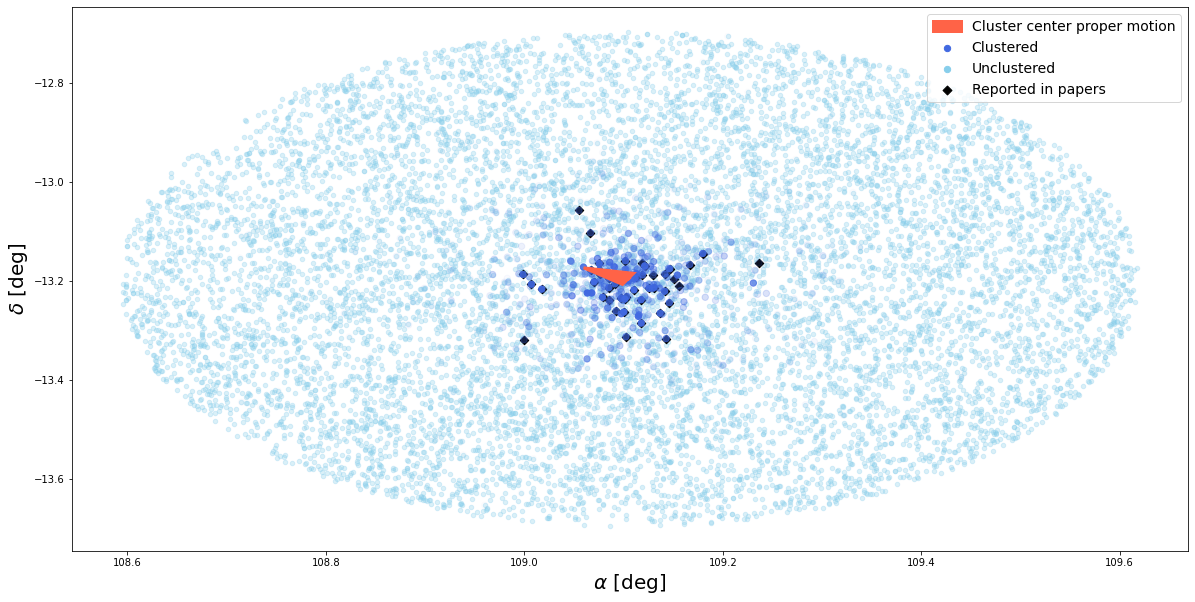

In [83]:
plt.figure(figsize=(20, 10))
plt.scatter(clustered.ra, clustered.dec, 
            color='royalblue', alpha=clustered.occurences, label='Clustered', zorder=2, s=40.)
plt.scatter(noise.ra, noise.dec, color='skyblue', label='Unclustered', zorder=1, s=20., alpha=.3)
plt.scatter(lit_dr3.ra, lit_dr3.dec, color='black', zorder=1,
            marker='D', label='Reported in papers')

plt.gca().set_xlabel('$\\alpha$ [deg]', fontsize=20);
plt.gca().set_ylabel('$\delta$ [deg]', fontsize=20);


plt.arrow(cp_ra,
          cp_dec,
          cp_pmra*(u.arcsec/u.year).to(u.deg/u.year),
          cp_pmdec*(u.arcsec/u.year).to(u.deg/u.year),
          linewidth=3.,
          color='tomato',
          head_width=0.025,
          head_length=0.05,
          zorder=4, label='Cluster center proper motion')

lgnd = plt.legend(fontsize=14, loc='upper right');
for handle in lgnd.legendHandles:
    handle._sizes = [40];
    handle._alpha = 1.;

In [84]:
clustered.to_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_clustered.csv')
found.to_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_found.csv')
not_found.to_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_not_found.csv')

# Convergent velocities

In [13]:
with open(f'optuna_db/{CLUSTER_NAME}/{CLUSTER_NAME.replace(" ", "_")}_cp_best_params.json', 'r') as f:
    best_params = json.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'optuna_db/NGC 188/NGC_188_cp_best_params.json'

In [ ]:
best_params

In [28]:
clustered, noise, found, not_found = run_dbscan(normalized_cp, gaiadr3, lit_dr3, 0.025, 25, False)

Classified into 51 labels.
Clustered: 724/957
724/957 sources from literature clustered
1384 clustered sources.


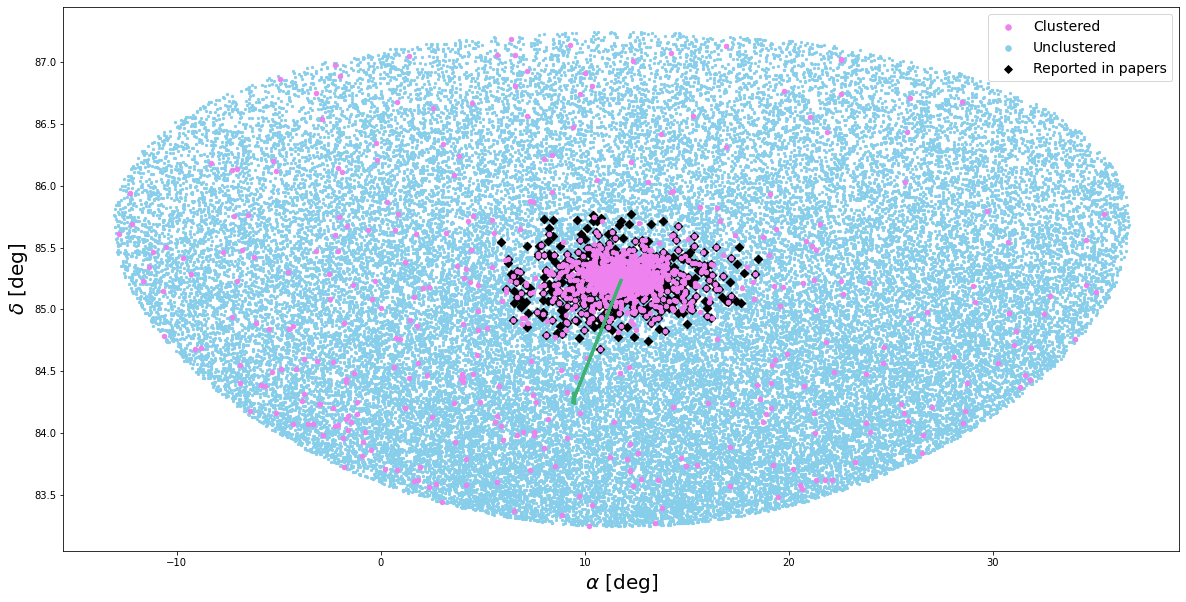

In [29]:
cluster_plot(clustered, gaiadr3, lit_dr3)
plt.arrow(cp_ra,
          cp_dec,
          cp_pmra,
          cp_pmdec,
          linewidth=3.,
          color='mediumseagreen',
          head_width=0.1,
          head_length=0.1,
          zorder=4)

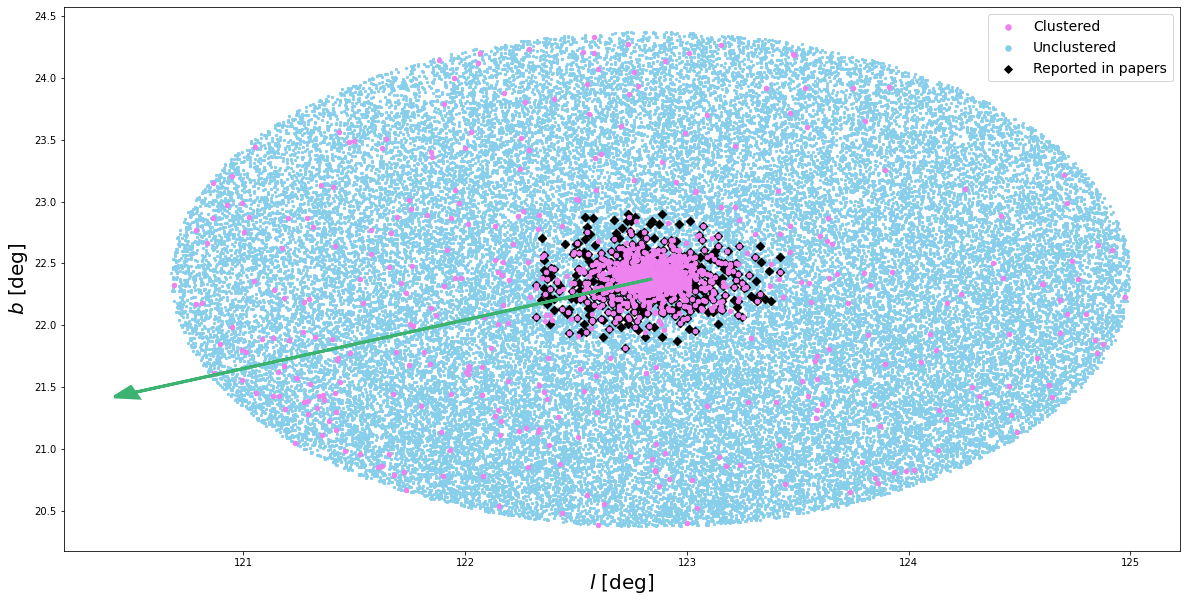

In [30]:
cluster_plot_galactic(clustered, gaiadr3, lit_dr3)
plt.arrow(galactic_coords.l.value,
          galactic_coords.b.value,
          galactic_coords.pm_l_cosb.value,
          galactic_coords.pm_b.value,
          linewidth=3.,
          color='mediumseagreen',
          head_width=0.1,
          head_length=0.1,
          zorder=4)

In [ ]:
a = np.loadtxt('Trumpler 5_isochrone.dat', usecols=(28, 29, 30))

In [ ]:
plt.plot(a[:-1, 1]-a[:-1, 2], a[:-1, 0])
plt.gca().invert_yaxis();